# **Assignment #1 - Reproducibility**
#### **Mining Large Scale Datasets 2024/2025**
#### Maria Rafaela Abrunhosa 107558

## Context and Motivation
This project aims to reproduce an application of a data mining process, published in a scientific venue [1]. We focus on replicating the predictive modelling as part of the data mining process.\
THe published paper used as a guide to this data mining process reproduction, presents two malware feature datasets on two different platforms to support validation of the effectiveness of a malware detection method.

The article consists of three contributions, starting with the development of two structures for creating datasets for malware for Windows and Android, by extracting features from malware analysis reports to create two datasets of malware features and, an evaluation of the usefulness of the datasets. However, in this work we will only attempt to reproduce the third point of evaluating the usefulness of the datasets in a supervised framework, as we have no way of replicating steps 1 and 2 of the article.

### What is reproducibility?
Reproducibility is the ability of a researcher to replicate the results of a previous study using the same materials that the original researcher used to try to get the same results as the previous study [2].

## Dataset and Pre-processing
First of all, it's important to note that the previous study has two datasets of malware characteristics, one for Windows malware and the other for Android malware, TUMALWD and TUANDROMD respectively. However, for the purposes of this reproduction, we'll only use the TUANDROMD dataset, as it was the only one provided and we couldn't find the other or anything identical.

#### Imports

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# %pip install xgboost

# machine learning modeling
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

In [46]:
# read the csv file - dataset TUANDROMD
data = pd.read_csv('TUANDROMD.csv')

data.head()

,ACCESS_ALL_DOWNLOADS,ACCESS_CACHE_FILESYSTEM,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_COARSE_UPDATES,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_MTK_MMHW,ACCESS_NETWORK_STATE,...,Landroid/telephony/TelephonyManager;->getLine1Number,Landroid/telephony/TelephonyManager;->getNetworkOperator,Landroid/telephony/TelephonyManager;->getNetworkOperatorName,Landroid/telephony/TelephonyManager;->getNetworkCountryIso,Landroid/telephony/TelephonyManager;->getSimOperator,Landroid/telephony/TelephonyManager;->getSimOperatorName,Landroid/telephony/TelephonyManager;->getSimCountryIso,Landroid/telephony/TelephonyManager;->getSimSerialNumber,Lorg/apache/http/impl/client/DefaultHttpClient;->execute,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,malware
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,malware
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malware
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,malware
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malware


### Check the following points/characteristics

To study if our dataset is similar to the dataset used in the previous study, we can verify some of the dataset characetristics, following the next points presented in the prior study report.

1) Characteristics of TUANDROMD written in the paper we are using as a guide:
    1) Labels in the data: The TUANDROMD dataset has 72 labels where 71 labels represents the whole malware family and the remaining one label belong to the normal class.

    2) Number of instances: There are a total 25,553 instances for both the permission and API-based features, of which 24,553 instances belong to the malware class and the rest 1000 instances belong to the benign class.

    3) Number of features: For permission-based features, all the permissions used by the applications are extracted as features. A total of 178 features are extracted. Similarly, for API based features, a total of 186 features are extracted.

    4) Balance between the classes: The dataset is not perfectly balanced i.e., the dataset does not have an equal number of instances for both classes. This slight imblance can be easily handled by collecting more instances or sampling techniques. The proposed dataset creation framework can handle such adaptaions.

    5) Recency: The data collected for creation of TUANDROMD are recent. As and when new malicious and normal android applications are available, the dataset can be updated accordingly.

    6) Relevance: The extracted features helps distinguish between malware and benign android applications. To the best of our knowledge, these features are relevant differentiating between the two.

Dataset shape:  (4465, 242)
Labels in the data:  Label
malware     3565
goodware     899
Name: count, dtype: int64
Number of instances:  4465
Number of features:  242


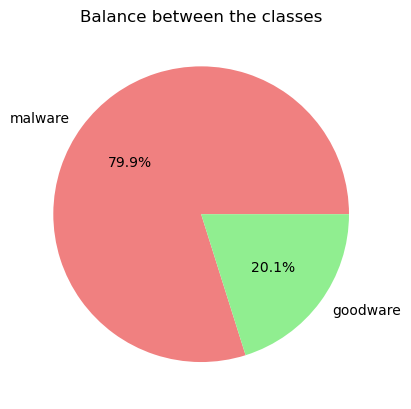

ACCESS_ALL_DOWNLOADS                                        1
ACCESS_CACHE_FILESYSTEM                                     1
ACCESS_CHECKIN_PROPERTIES                                   1
ACCESS_COARSE_LOCATION                                      1
ACCESS_COARSE_UPDATES                                       1
                                                           ..
Landroid/telephony/TelephonyManager;->getSimOperatorName    1
Landroid/telephony/TelephonyManager;->getSimCountryIso      1
Landroid/telephony/TelephonyManager;->getSimSerialNumber    1
Lorg/apache/http/impl/client/DefaultHttpClient;->execute    1
Label                                                       1
Length: 242, dtype: int64


In [47]:
# dataset size
print("Dataset shape: ", data.shape) # (4465, 242)

# labels in the data
labels = data['Label'].value_counts() # malware 3565 + goodware 899
print("Labels in the data: ", labels)

# number of instances
print("Number of instances: ", len(data)) # 4465

# number of features
print("Number of features: ", len(data.columns)) # 242

# balance between the classes
data['Label'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.ylabel('')
plt.title('Balance between the classes') # very unbalanced dataset
plt.show()

# check missing values
print(data.isnull().sum()) # one empty line

# **<font color="lightcoral"></font>**

### Conclusions about the previous characteristics

##### **1. Labels in the data**
According to the study report, we should have 72 labels, 71 representing the malware family and the last one representing the goodware. However, as we can verify on the previous code and results, our dataset has only two classes, the malware and the goodware, there is no distinguish between the different types of malware.\
Thus, we are now dealing with a binary class problem instead of a multiclass, which means the results and the reproductibility will no longer be possible.

##### **2. and 3. Number of instances and Number of features**
In the prior study, they have in total 25,553 instances while we only have 4465.\
In terms of features, we have 241 and the last column is targer value, the label.

##### **4. Balance between the classes**
Regarding the balance between the classes, the our dataset is also very unbalanced as the dataset used in the guide paper. We have 79.9% of the data labeled as malware and 20.1% labeled as goodware.

##### **5. and 6. Recency and Relevance**
As for recency, we can't tell if the data is recent and, unlike the study, when there are new android apps available, good or bad, the dataset isn't updated with this new data.

We can say that in terms of relevance, the features make it possible to distinguish between malware and goodware applications.\
In addition, we can study the top 15 features in our dataset and compare them with those in the study provided.

### Check the top features for TUANDROMD

**TABLE I** - LIST OF TOP RANKED FEATURES FOR TUANDROMD written in the paper we are using as a guide

| Feature Rank | Feature Name |
| ------------ | ------------ |
| 1 | SEND_SMS |
| 2 | RECEIVE_BOOT_COMPLETED |
| 3 | GET_TASKS |
| 4 | *Ljava/net/URL;* − > *openConnection* |
| 5 | VIBRATE |
| 6 | WAKE_LOCK |
| 7 | KILL_BACKGROUND_PROCESSES |
| 8 | SYSTEM_ALERT_WINDOW |
| 9 | ACCESS_WIFI_STATE |
| 10 | DISABLE_KEY_GUARD |
| 11 | *Landroid/location/LocationManager;* − > *getLastKnownLocation* |
| 12 | READ_PHONE_STATE |
| 13 | RECEIVE_SMS |
| 14 | CHANGE_WIFI_STATE |
| 15 | WRITE_EXTERNAL_STORAGE |

In [48]:
# train and test split
data2 = data.dropna()
# print(data2.isnull().sum()) # one empty line

X = data2.drop(columns=['Label'])
y = data2['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

                                               Feature  Importance
149                             RECEIVE_BOOT_COMPLETED    0.154621
220                     Ljava/net/URL;->openConnection    0.095576
228  Landroid/location/LocationManager;->getLastKgo...    0.072026
86                                           GET_TASKS    0.060979
191                                          WAKE_LOCK    0.058397
100                          KILL_BACKGROUND_PROCESSES    0.037840
217                           Ljava/lang/System;->load    0.032456
138                                   READ_PHONE_STATE    0.029641
219                    Ljava/lang/System;->loadLibrary    0.023947
218          Ldalvik/system/DexClassLoader;->loadClass    0.022712
152                                        RECEIVE_SMS    0.020154
216                          Ljava/lang/Runtime;->exec    0.018967
190                                            VIBRATE    0.018231
233  Landroid/telephony/TelephonyManager;->getNetwo...    0.01

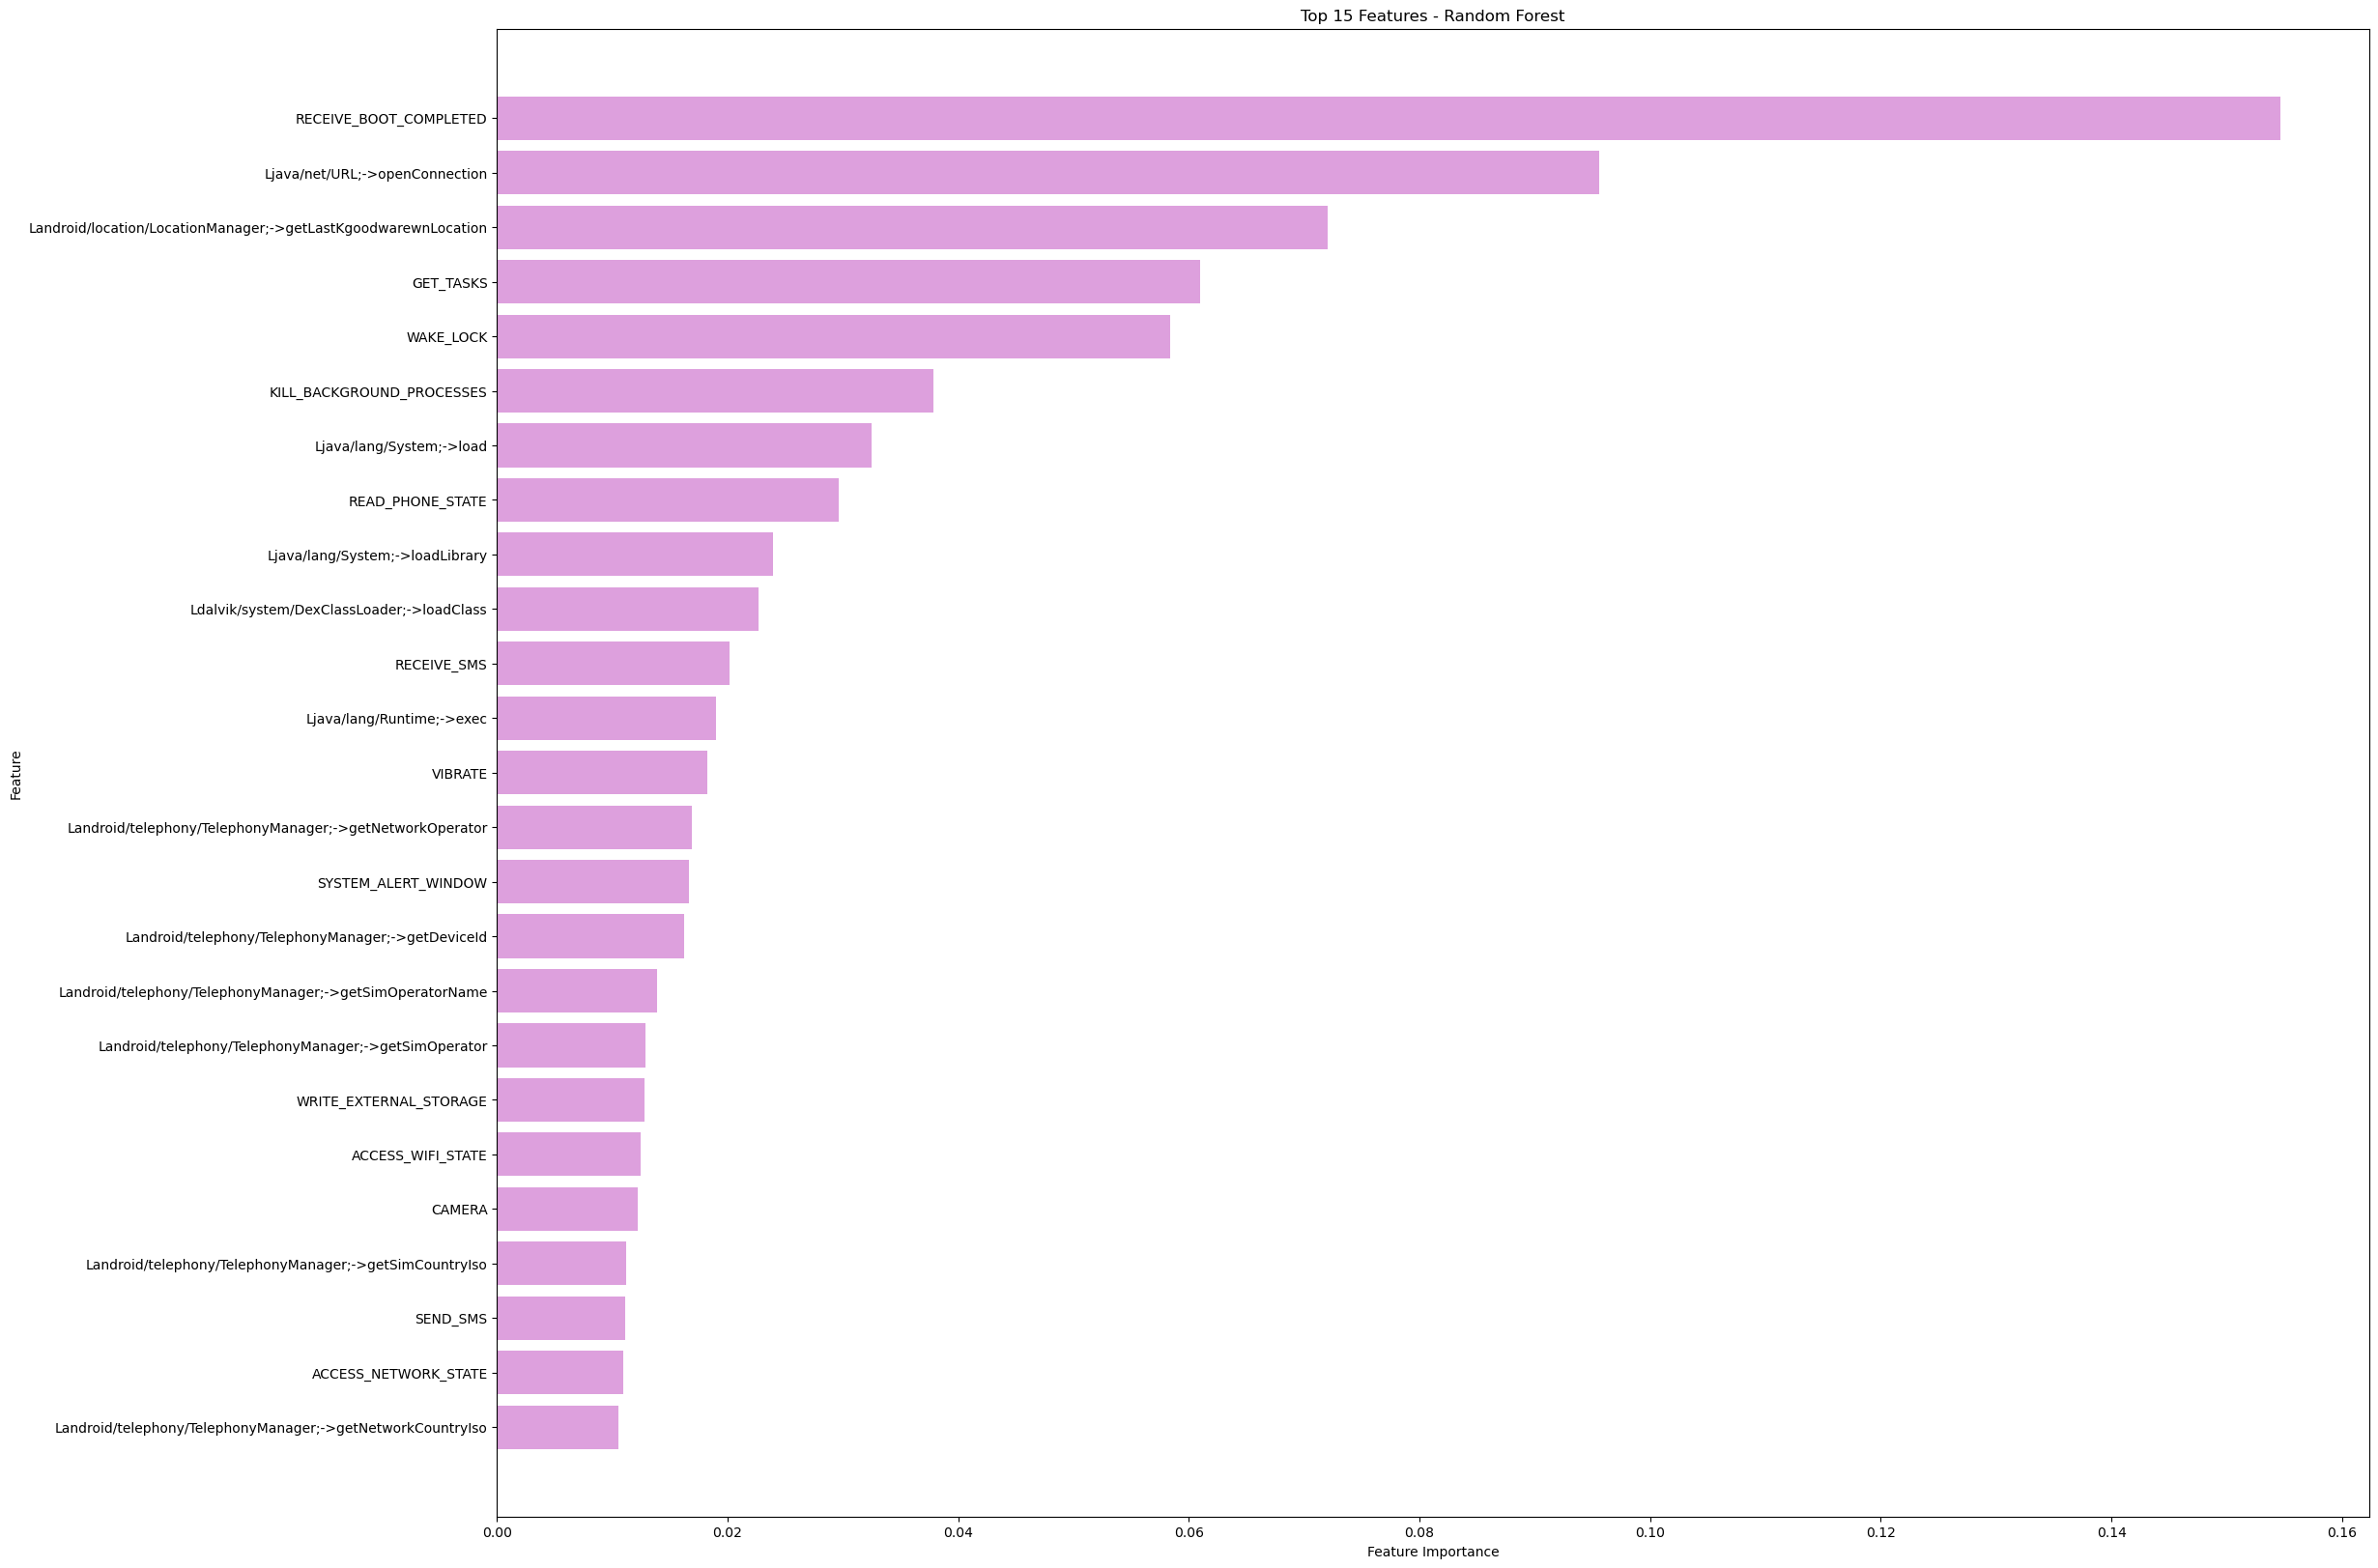

In [49]:
# list of top ranked features for tuandromd (15)
rf = RandomForestClassifier(n_estimators=100, random_state=42) # train random forest classifier
rf.fit(X_train, y_train)

# extract important features
importances = rf.feature_importances_
featureNames = X.columns

dfFeatureImportance = pd.DataFrame({'Feature': featureNames, 'Importance': importances})

# rank features by importance
topFeatures = dfFeatureImportance.sort_values(by='Importance', ascending=False)
print(topFeatures.head(15)) # to show all the 15 features

plt.figure(figsize=(25, 20))
plt.barh(topFeatures['Feature'].head(25), topFeatures['Importance'].head(25), color='plum')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 15 Features - Random Forest")
plt.gca().invert_yaxis() # most important first place
plt.show()

**TABLE II** - LIST OF TOP RANKED FEATURES FOR TUANDROMD calculated using a Random Forest (trying to reproduce the paper results)

| Feature Rank | Feature | Importance |
| ------------ | ------- | ---------- |
| 1 |                            RECEIVE_BOOT_COMPLETED  |  0.154621 |
| 2 |                    Ljava/net/URL;->openConnection  |  0.095576 |
| 3 | Landroid/location/LocationManager;->getLastKgoodwarewnLocation  |  0.072026 |
| 4 |                                         GET_TASKS  |  0.060979 |
| 5 |                                         WAKE_LOCK  |  0.058397 |
| 6 |                         KILL_BACKGROUND_PROCESSES  |  0.037840 |
| 7 |                          Ljava/lang/System;->load  |  0.032456 |
| 8 |                                  READ_PHONE_STATE  |  0.029641 |
| 9 |                   Ljava/lang/System;->loadLibrary  |  0.023947 |
| 10 |         Ldalvik/system/DexClassLoader;->loadClass  |  0.022712 |
| 11 |                                       RECEIVE_SMS  |  0.020154 |
| 12 |                         Ljava/lang/Runtime;->exec  |  0.018967 |
| 13 |                                           VIBRATE  |  0.018231 |
| 14 | Landroid/telephony/TelephonyManager;->getNetworkOperator  |  0.016859 |
| 15 |                               SYSTEM_ALERT_WINDOW  |  0.016633 |

<br>

### Conclusions about the 15 top features
##### Comparing our results with the prior study

# **<font color="lightcoral">passou de multiclass para binary class - check here</font>**

## Performance Evaluation and Valition

#### Cross Validation:

#### Classifiers:
- **Random Forest:**
- **Extra Tree:**
- **Ada Boost:**
- **Xg Boost:**
- **Gradient boosting:**

#### Parameters:
... \

#### Metrics:
The only metric used for performance evaluation in the prior study was the test accuracy, or at least is the only one that is mencioned in the study.

In [50]:
# cross validation with k=10
nfolds = 10
kfold = KFold(n_splits=nfolds, shuffle=True, random_state=42)

42 as convention of random state.
- Reproducibility – Ensures that the same random numbers are generated every time the code is run.
- Consistency – Helps maintain consistency in experiments, making debugging and comparisons easier.

In [51]:
# initialize 5 classifiers
rfClassifier = RandomForestClassifier(n_estimators=100, random_state=42)
etClassifier = ExtraTreesClassifier(n_estimators = 100, criterion ='entropy')
abClassifier = AdaBoostClassifier(n_estimators=100, random_state=42)
xgbClassifier = XGBClassifier(n_estimators=100, max_depth=1, learning_rate=1.0, objective='binary:logistic')
gbClassifier = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

# train 5 classifiers
crossResultsrfClassifier = cross_val_score(rfClassifier, X, y, cv=kfold)
crossResultsetClassifier = cross_val_score(etClassifier, X, y, cv=kfold)
crossResultsabClassifier = cross_val_score(abClassifier, X, y, cv=kfold)
crossResultsgbClassifier = cross_val_score(gbClassifier, X, y, cv=kfold)

label_encoder = LabelEncoder()
yEncode = label_encoder.fit_transform(y) # xgb only accepts numerical values so we need to convert the labels to 0 and 1
# print(y) # 'goodware' -> 0 and 'malware' -> 1
crossResultsxgbClassifier = cross_val_score(xgbClassifier, X, yEncode, cv=kfold)

# evaluate models accuracy
print(f'Cross-Validation Random Forest Classifier Results (Accuracy): {crossResultsrfClassifier}')
print(f'Mean Accuracy Random Forest Classifier: {crossResultsrfClassifier.mean()}')

print(f'Cross-Validation Extra Tree Classifier Results (Accuracy): {crossResultsetClassifier}')
print(f'Mean Accuracy Extra Tree Classifier: {crossResultsetClassifier.mean()}')

print(f'Cross-Validation Ada Boost Classifier Results (Accuracy): {crossResultsabClassifier}')
print(f'Mean Accuracy Ada Boost Classifier: {crossResultsabClassifier.mean()}')

print(f'Cross-Validation XgBoost Classifier Results (Accuracy): {crossResultsxgbClassifier}')
print(f'Mean Accuracy XgBoostClassifier: {crossResultsxgbClassifier.mean()}')

print(f'Cross-Validation Gradient Boosting Classifier Results (Accuracy): {crossResultsgbClassifier}')
print(f'Mean Accuracy Gradient Boosting Classifier: {crossResultsgbClassifier.mean()} %')

Cross-Validation Random Forest Classifier Results (Accuracy): [0.99552573 0.99552573 0.99328859 0.99776286 0.9955157  0.98878924
 0.99327354 0.99775785 0.9955157  0.99775785]
Mean Accuracy Random Forest Classifier: 0.9950712773748258
Cross-Validation Extra Tree Classifier Results (Accuracy): [0.99552573 0.99552573 0.99328859 0.99552573 0.9955157  0.99103139
 0.9955157  0.99775785 0.9955157  0.99775785]
Mean Accuracy Extra Tree Classifier: 0.9952959942215669
Cross-Validation Ada Boost Classifier Results (Accuracy): [0.98210291 0.98657718 0.97091723 0.97986577 0.98430493 0.98206278
 0.98430493 0.98878924 0.98654709 0.98430493]
Mean Accuracy Ada Boost Classifier: 0.9829776988593615
Cross-Validation XgBoost Classifier Results (Accuracy): [0.97986577 0.98881432 0.96868009 0.97986577 0.98430493 0.98206278
 0.98430493 0.9955157  0.98878924 0.98654709]
Mean Accuracy XgBoostClassifier: 0.9838750614460128
Cross-Validation Gradient Boosting Classifier Results (Accuracy): [0.97762864 0.98434004 0.

### Table of obtained results

| Classifier | Test Accuracy - TUANDROMD |
| ---------- | ------------- |
| Random Forest | 99.5% |
| Extra Tree | 99.5% |
| Ada Boost | 98.3% |
| XgBoost | 98.4% |
| Gradient Boosting | 98.2% |

### Table of the prior study results

| Classifier | Test Accuracy - TUANDROMD |
| ---------- | ------------- |
| Random Forest | 98.7% |
| Extra Tree | 98.8% |
| Ada Boost | 97.9% |
| XgBoost | 97.8% |
| Gradient Boosting | 97.4% |

### Comparison of the results

In [61]:
dataTopFeatures = data[topFeatures.head(15)['Feature'].tolist() + ['Label']] # using only the top 15 features
print(dataTopFeatures.shape)

dataTopFeatures = dataTopFeatures.dropna()

XTopFeatures = dataTopFeatures.drop(columns=['Label'])
yTopFeatures = dataTopFeatures['Label']

(4465, 16)


In [62]:
# cross validation with k=10
nfoldsTopFeatures = 10
kfoldTopFeatures = KFold(n_splits=nfoldsTopFeatures, shuffle=True, random_state=42)

# initialize 5 classifiers
rfClassifierTopFeatures = RandomForestClassifier(n_estimators=100, random_state=42)
etClassifierTopFeatures = ExtraTreesClassifier(n_estimators = 100, criterion ='entropy')
abClassifierTopFeatures = AdaBoostClassifier(n_estimators=100, random_state=42)
xgbClassifierTopFeatures = XGBClassifier(n_estimators=100, max_depth=1, learning_rate=1.0, objective='binary:logistic')
gbClassifierTopFeatures = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

# train 5 classifiers
crossResultsrfClassifierTopFeatures = cross_val_score(rfClassifierTopFeatures, XTopFeatures, yTopFeatures, cv=kfoldTopFeatures)
crossResultsetClassifierTopFeatures = cross_val_score(etClassifierTopFeatures, XTopFeatures, yTopFeatures, cv=kfoldTopFeatures)
crossResultsabClassifierTopFeatures = cross_val_score(abClassifierTopFeatures, XTopFeatures, yTopFeatures, cv=kfoldTopFeatures)
crossResultsgbClassifierTopFeatures = cross_val_score(gbClassifierTopFeatures, XTopFeatures, yTopFeatures, cv=kfoldTopFeatures)

label_encoder = LabelEncoder()
yEncodeTopFeatures = label_encoder.fit_transform(y) # xgb only accepts numerical values so we need to convert the labels to 0 and 1
# print(y) # 'goodware' -> 0 and 'malware' -> 1
crossResultsxgbClassifierTopFeatures = cross_val_score(xgbClassifierTopFeatures, X, yEncodeTopFeatures, cv=kfoldTopFeatures)

# evaluate models accuracy
print(f'Cross-Validation Random Forest Classifier TopFeatures Results (Accuracy): {crossResultsrfClassifierTopFeatures}')
print(f'Mean Accuracy Random Forest Classifier TopFeatures: {crossResultsrfClassifierTopFeatures.mean()}')

print(f'Cross-Validation Extra Tree Classifier TopFeatures Results (Accuracy): {crossResultsetClassifierTopFeatures}')
print(f'Mean Accuracy Extra Tree Classifier TopFeatures: {crossResultsetClassifierTopFeatures.mean()}')

print(f'Cross-Validation Ada Boost Classifier TopFeatures Results (Accuracy): {crossResultsabClassifierTopFeatures}')
print(f'Mean Accuracy Ada Boost Classifier TopFeatures: {crossResultsabClassifierTopFeatures.mean()}')

print(f'Cross-Validation XgBoost Classifier TopFeatures Results (Accuracy): {crossResultsxgbClassifierTopFeatures}')
print(f'Mean Accuracy XgBoostClassifier TopFeatures: {crossResultsxgbClassifierTopFeatures.mean()}')

print(f'Cross-Validation Gradient Boosting Classifier TopFeatures Results (Accuracy): {crossResultsgbClassifierTopFeatures}')
print(f'Mean Accuracy Gradient Boosting Classifier TopFeatures: {crossResultsgbClassifierTopFeatures.mean()} %')

Cross-Validation Random Forest Classifier TopFeatures Results (Accuracy): [0.98881432 0.98881432 0.9753915  0.98881432 0.98430493 0.98206278
 0.98654709 0.99327354 0.98654709 0.98654709]
Mean Accuracy Random Forest Classifier TopFeatures: 0.9861116963112329
Cross-Validation Extra Tree Classifier TopFeatures Results (Accuracy): [0.99105145 0.98881432 0.97762864 0.98657718 0.98430493 0.98206278
 0.98430493 0.99327354 0.98430493 0.98878924]
Mean Accuracy Extra Tree Classifier TopFeatures: 0.9861111947111285
Cross-Validation Ada Boost Classifier TopFeatures Results (Accuracy): [0.97091723 0.98210291 0.95973154 0.96420582 0.97533632 0.97085202
 0.96860987 0.97085202 0.97085202 0.97533632]
Mean Accuracy Ada Boost Classifier TopFeatures: 0.9708796059429581
Cross-Validation XgBoost Classifier TopFeatures Results (Accuracy): [0.97986577 0.98881432 0.96868009 0.97986577 0.98430493 0.98206278
 0.98430493 0.9955157  0.98878924 0.98654709]
Mean Accuracy XgBoostClassifier TopFeatures: 0.983875061446

### Table of obtained results for 15 top features

| Classifier | Test Accuracy - TUANDROMD |
| ---------- | ------------- |
| Random Forest | 98.6% |
| Extra Tree | 98.6% |
| Ada Boost | 97.1% |
| XgBoost | 98.4% |
| Gradient Boosting | 97.4% |

### Comparison of the results

## Conclusions

In [54]:
# DONE: clean code
# DONE: add code description
# TODO: complete notebook text and explanation
# TODO: improve english

## Bibliography
[1] https://ieeexplore.ieee.org/document/9312053\
[2] https://uapt33090-my.sharepoint.com/:b:/r/personal/alina_trifan_ua_pt/Documents/MDLE/aula%2002/MLD_02.pdf?csf=1&web=1&e=0AwwEE\
[3] https://stackoverflow.com/questions/54034392/machine-learning-feature-ranking-by-algorithms\
[4] https://www.geeksforgeeks.org/feature-selection-using-random-forest/\
[5] https://www.geeksforgeeks.org/cross-validation-machine-learning/\
[6] https://www.geeksforgeeks.org/random-forest-algorithm-in-machine-learning/\
[7] https://www.geeksforgeeks.org/ml-extra-tree-classifier-for-feature-selection/\
[8] https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html\
[9] https://xgboost.readthedocs.io/en/stable/get_started.html\
[10] https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html\
[11] https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html\
[12] https://stackoverflow.com/questions/34265102/xgboost-categorical-variables-dummification-vs-encoding\
[13] https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html\
[14] https://www.markdownguide.org/hacks/\
[15]